# -------------------------- LOGISTIC REGRESSION -------------------------------

1. Data Exploration:
    * Load the dataset and perform exploratory data analysis (EDA).
    * Examine the features, their types, and summary statistics.
    * Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

      Analyze any patterns or correlations observed in the data.

2. Data Preprocessing:
    * Handle missing values (e.g., imputation).
    * Encode categorical variables.

3. Model Building:
    * Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    * Train the model using the training data.

4. Model Evaluation:
    * Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
      Visualize the ROC curve.

5. Interpretation:
    * Interpret the coefficients of the logistic regression model.
    * Discuss the significance of features in predicting the target variable (survival probability in this case).

6. Deployment with Streamlit:
      In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.


      (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.

      Detailed deployment instructions are available in the Streamlit Documentation.
      https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app


Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import joblib

1. Data Exploration:
    * Load the dataset and perform exploratory data analysis (EDA).
    * Examine the features, their types, and summary statistics.
    * Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

      Analyze any patterns or correlations observed in the data.


2. Data Preprocessing:
    * Handle missing values (e.g., imputation).
    * Encode categorical variables.

In [2]:
# ***STEP 1: DATA EXPLORATION***

# Loading the dataset
df = pd.read_csv('diabetes.csv')

# Basic Information
print('Dataset Shape:',df.shape)
df.head()

Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Summary Statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Data Types
# Missing Values

print('\nData Types:\n',df.dtypes)
print('\nMissing Values:\n',df.isnull().sum())


Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### By using the function isnull().sum() all the values are showing '0' which means there are no missing values in the dataset, but do contain unmeasured values. Will treat them after visualization. Hence we will proceed with next steps.

### There are all numerical columns and not a single categorical column available in the dataset.

In [6]:
# ***STEP 2: Visualization***

# Set Style
sns.set(style='whitegrid',palette='pastel')

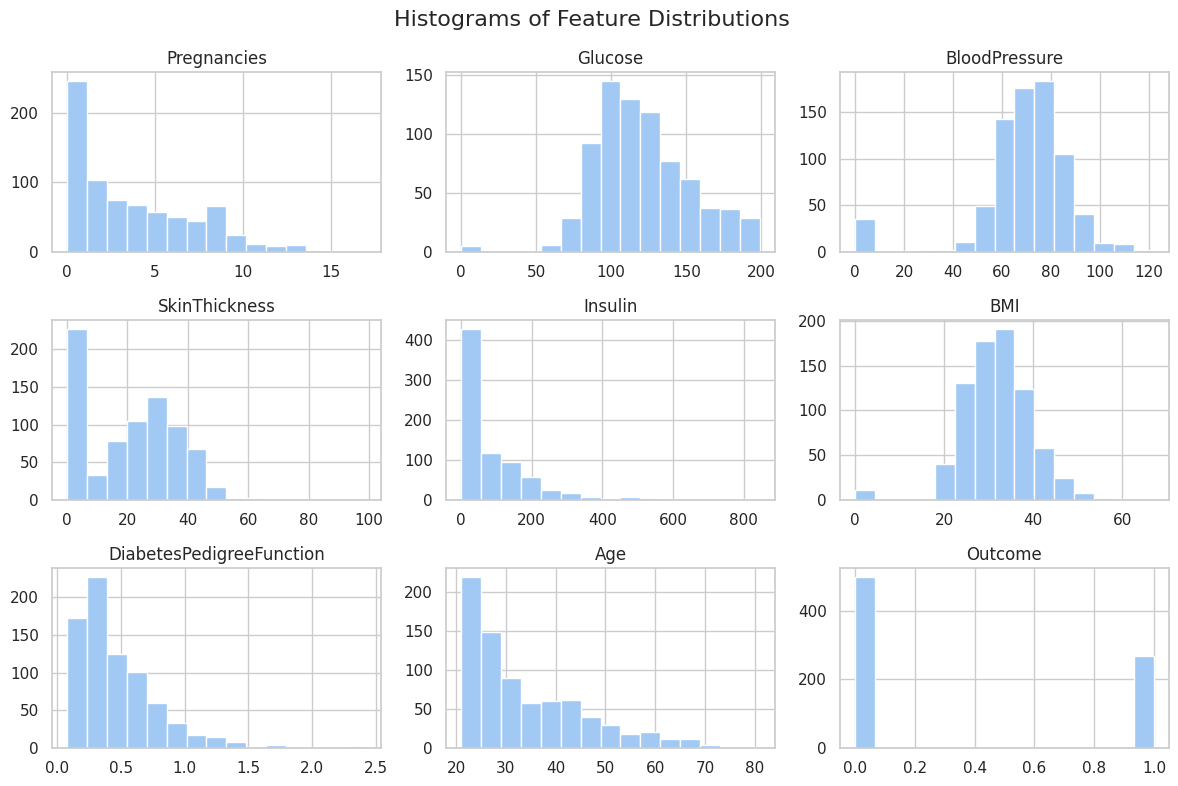

In [7]:
# Histograms

df.hist(bins=15,figsize=(12,8))
plt.suptitle('Histograms of Feature Distributions',fontsize=16)
plt.tight_layout()
plt.show()

#### OBSERVATIONS:

* Glucose: Typically, higher glucose values are linked to higher diabetes probability (Outcome = 1).

* BMI: Overweight/obese individuals (BMI > 30) show higher diabetes likelihood.

* Age: Slightly right-skewed, more middle-aged women, with higher age correlated with diabetes.

* Insulin: Heavily right skewed, with many zeros, this may represent missing or unmeasured values.

* BloodPressure / SkinThickness: Also show some zeros, which are unrealistic and should be treated as missing.

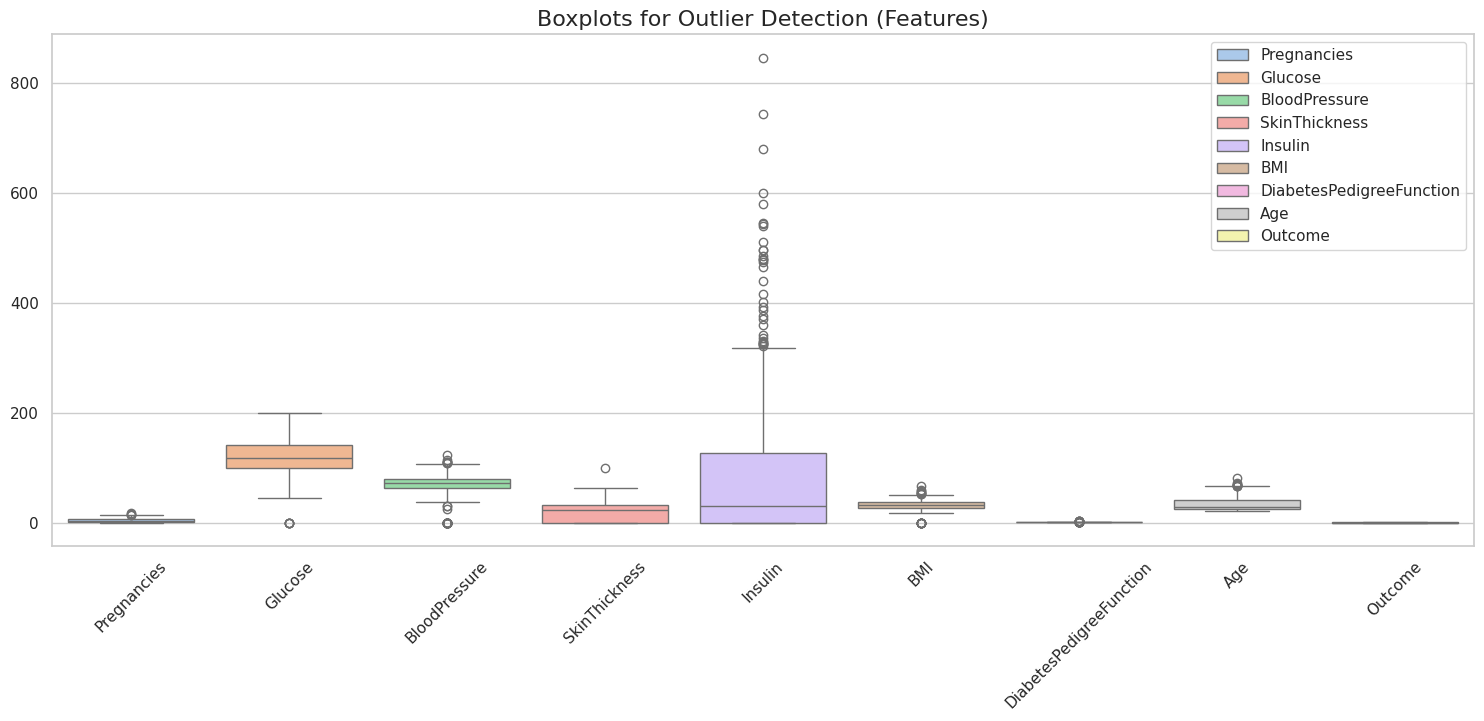

In [8]:
# Boxplots for outlier Detection

plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.title('Boxplots for Outlier Detection (Features)',fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(df.columns)
plt.show()

#### OBSERVATIONS:

Features like Insulin, SkinThickness, and Glucose show outliers.

Some outliers might be legitimate (e.g., high glucose), but others may be data errors or missing indicators (zeros).

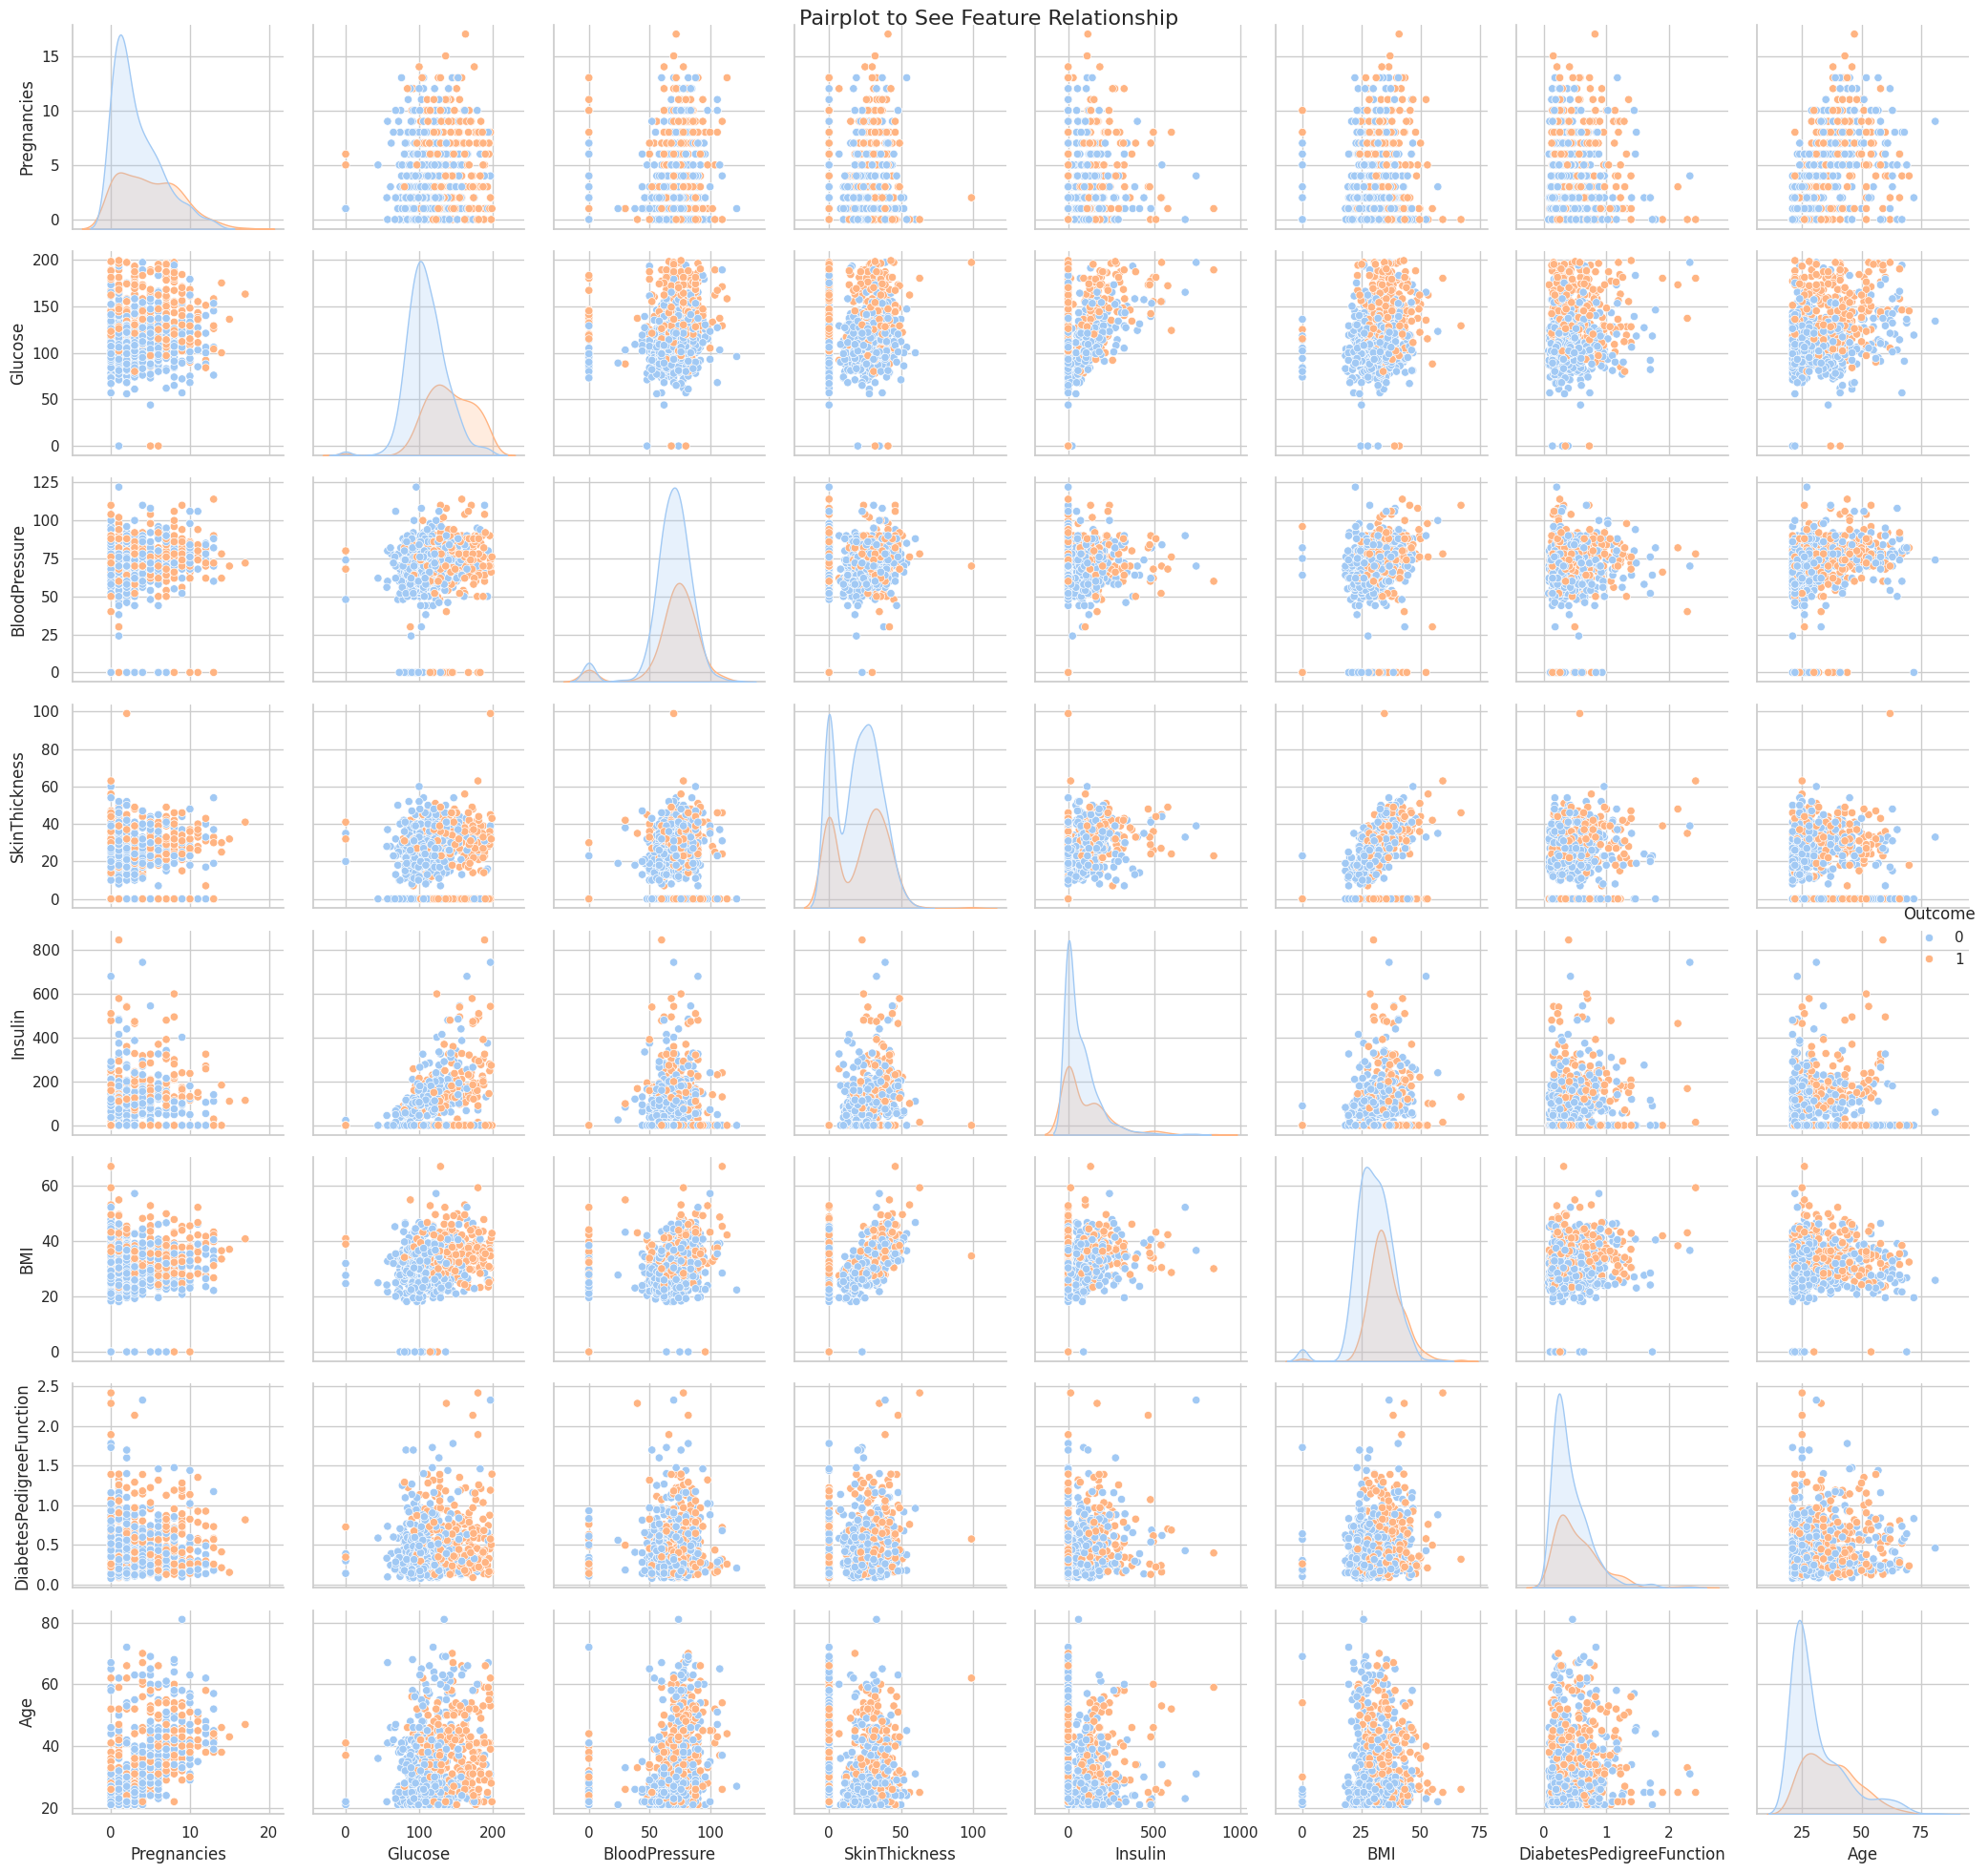

In [9]:
# Pairplot to see feature Relationship

sns.pairplot(df,hue='Outcome')
plt.suptitle('Pairplot to See Feature Relationship',fontsize=16)
plt.tight_layout()
plt.show()

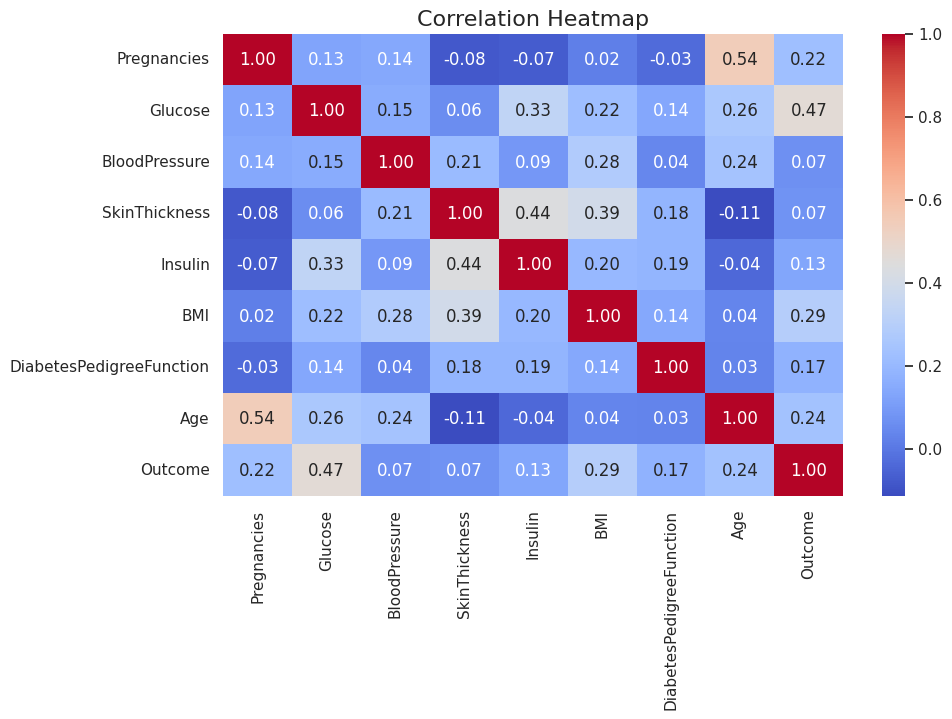

In [10]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap',fontsize=16)
plt.show()

#### SUMMARY: EDA Findings:

* Strongest predictors: Glucose, BMI, Age, Pregnancies

* Potential issues: Zeros in Insulin, SkinThickness, BloodPressure, BMI

* No categorical variables (all numeric)

* Target variable (Outcome) is binary (0 = no diabetes, 1 = diabetes)

In [11]:
# ***STEP 3: PREPROCESSING***

# Replacing 0s with NaN in the selected Columns

cols_with_zeros = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0,np.nan)
df[cols_with_zeros]

,Glucose,Insulin,SkinThickness,BloodPressure,BMI
0,148.0,NaN,35.0,72.0,33.6
1,85.0,NaN,29.0,66.0,26.6
2,183.0,NaN,NaN,64.0,23.3
3,89.0,94.0,23.0,66.0,28.1
4,137.0,168.0,35.0,40.0,43.1
...,...,...,...,...,...
763,101.0,180.0,48.0,76.0,32.9
764,122.0,NaN,27.0,70.0,36.8
765,121.0,112.0,23.0,72.0,26.2
766,126.0,NaN,NaN,60.0,30.1


In [12]:
# Checking for missing values after replacement with NaN

df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
# Imputing the missing values using median

df.fillna(df.median(),inplace=True)
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3. Model Building:
    * Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    * Train the model using the training data.

4. Model Evaluation:
    * Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
      Visualize the ROC curve.

In [14]:
# Splitting into feature and target variable

X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [15]:
# Standardize

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [16]:
# Train-Test split (80/20)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# ***STEP 3: MODEL BUILDING***

# Logistic Regression Model

model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
# Model Evaluation

y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]

# Calculate Accuracy:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')

# Calculate Precision:
precision=precision_score(y_test,y_pred)
print(f'Precision: {precision:.2f}')

# Calculate Recall:
recall=recall_score(y_test,y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-Score:
f1=f1_score(y_test,y_pred)
print(f'F1-Score: {f1:.2f}')

# Calculate ROC-AUC Score:
roc_auc=roc_auc_score(y_test,y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

Accuracy:0.75
Precision: 0.67
Recall: 0.62
F1-Score: 0.64
ROC-AUC Score: 0.82


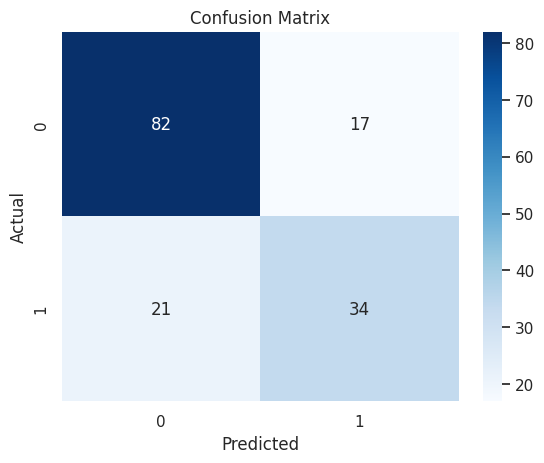

Confusion Matrix:
 [[82 17]
 [21 34]]


In [19]:
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Confusion Matrix:\n',cm)


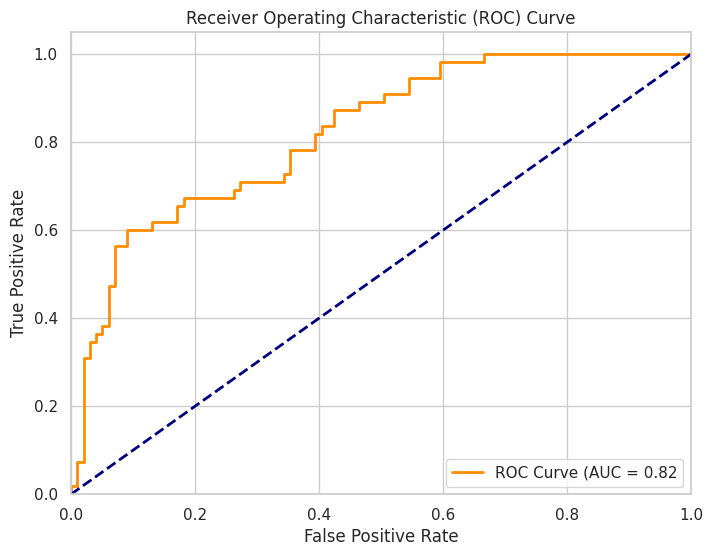

In [20]:
# ROC Curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC Curve (AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

5. Interpretation:
    * Interpret the coefficients of the logistic regression model.
    * Discuss the significance of features in predicting the target variable (survival probability in this case).

In [21]:
# Model Coefficients

coef_df=pd.DataFrame({'Feature':X.columns,'Coefficient':model.coef_[0]})
print('Model Coefficient:', coef_df)
print('Intercept:',model.intercept_[0])

Model Coefficient:                     Feature  Coefficient
0               Pregnancies     0.067629
1                   Glucose     0.037338
2             BloodPressure    -0.013234
3             SkinThickness     0.007714
4                   Insulin    -0.001669
5                       BMI     0.101797
6  DiabetesPedigreeFunction     0.553694
7                       Age     0.034603
Intercept: -9.405425107520514


6. Deployment with Streamlit:
      In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.


      (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.

Interview Questions:
1. What is the difference between precision and recall?
  
  ANS-->
  
  Precision and recall are evaluation metrics used to measure the performance of a classification model, especially in imbalanced datasets.

  * Precision measures how many of the predicted positive cases were actually positive.
  
      When the model says positive, how often is it correct?”

      Use case: Important when the cost of a false positive is high (e.g., spam detection).

  * Recall (also called Sensitivity) measures how many of the actual positive cases the model correctly identified.
      
      Of all the actual positives, how many did the model catch?”

      Use case: Important when the cost of a false negative is high (e.g., disease detection).

2. What is cross-validation, and why is it important in binary classification?

  ANS-->

  * Cross-validation is a technique used to evaluate the performance and generalization ability of a machine learning model.
  
  * It helps ensure that the model performs well not just on the training data, but also on unseen data.

      How it works (e.g., k-Fold Cross-Validation):

      The dataset is split into k equal parts (folds).

      The model is trained on k-1 folds and tested on the remaining one.

      This process is repeated k times, each time using a different fold for testing.

The average performance across all folds is taken as the model's overall score.

Why it's important:

* Provides a more reliable estimate of model performance.

* Reduces overfitting risk, since the model is tested on multiple subsets.

* Uses all data efficiently, as every data point is used for both training and validation.